In [590]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import my_functions
import importlib
importlib.reload(my_functions)
from my_functions import *

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# DATA

In [591]:
data = pd.read_csv('stud_math.csv')

data.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   fam_size            368 non-null    object 
 5   p_status            350 non-null    object 
 6   m_edu               392 non-null    float64
 7   f_edu               371 non-null    float64
 8   m_job               376 non-null    object 
 9   f_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  travel_time         367 non-null    float64
 13  study_time          388 non-null    float64
 14  failures            373 non-null    float64
 15  school_sup          386 non-null    object 
 16  fam_sup 

In [592]:
data.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# PRIMARY PROCESSING DATA

In [593]:
# Заменим в соотв. колонках слова YES и NO на бинарные значения 
data[['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']] = data[['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].apply(yn_to_binary)

# EDA

In [594]:
# посчитаем количество пустых значений по всем колонкам
data.apply(lambda x: x.isna().sum())

# Особенно выделяются колонки paid и p_status, где более 10% пустых значений

school                 0
sex                    0
age                    0
address               17
fam_size              27
p_status              45
m_edu                  3
f_edu                 24
m_job                 19
f_job                 36
reason                17
guardian              31
travel_time           28
study_time             7
failures              22
school_sup             9
fam_sup               39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
fam_rel               27
free_time             11
go_out                 8
health                15
absences              12
score                  6
dtype: int64

## ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

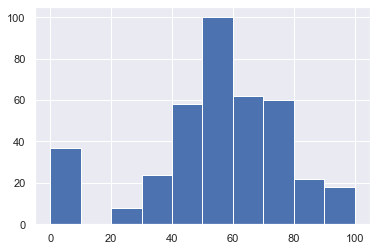

In [595]:
# Рассмотрим целевую колонку score
data.score.hist()
# data.score.value_counts(dropna=False)
data.score.describe()

# Возможно, стоит учесть тот факт, что солидная часть оценок равна нулям (37 из 389 не пустых), т.е., возможно, студент совсем не сдал экзамен, либо даже не допустился, что может говорить о тотальном отставании в учебе по каким-либо причинам. В остальном оценки распределены более менее нормально.
# Выбросов не наблюдается

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

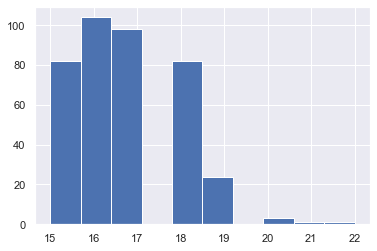

In [596]:
# колонка age : видим, что основная часть данных распределена между 15 и 18 годами
# небольбшая доля значений 19
# совсем небольшая доля выше 19, возможно, совсем незначительная
# Однако все значения не выходят за рамки выбросов 
data.age.hist()
data.age.value_counts(dropna=False)


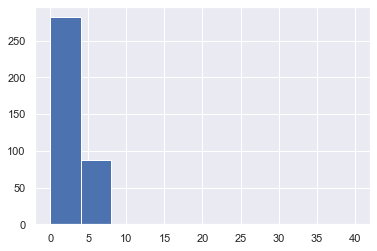

In [597]:
# нашли выброс-ошибку в колонке f_edu, выпадающий за приведенную в легенде шкалу
data.f_edu.hist();

In [598]:
# удалим выброс f_edu
data = data.loc[data.f_edu<=4]

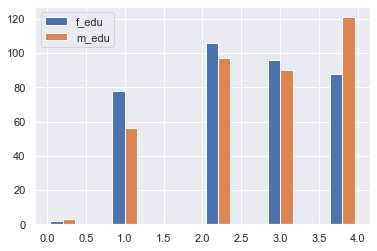

In [599]:
# Теперь рассмотрим сразу 2 схожих переменных m_edu и f_edu
# Распределение схожее, более менее нормальное. 
# Незначительное количество родителей без образования
plt.hist([data.f_edu, data.m_edu],label=['f_edu','m_edu'])
plt.legend();

1.0    225
2.0     92
NaN     25
3.0     21
4.0      7
Name: travel_time, dtype: int64

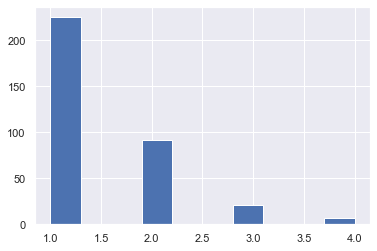

In [600]:
# Признак travel_time распределен нормально.
# большое количество пустых значений (25)
data.travel_time.hist();
data.travel_time.value_counts(dropna=False)

2.0    182
1.0     98
3.0     58
4.0     25
NaN      7
Name: study_time, dtype: int64

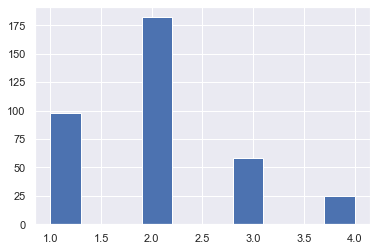

In [601]:
# Признак travel_time распределен нормально.
data.study_time.hist()
data.study_time.value_counts(dropna=False)

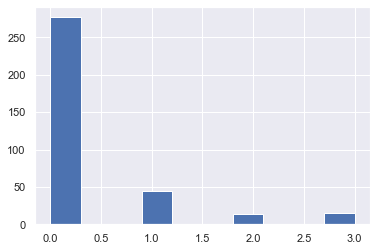

In [602]:
# Распределение неудач студентов сильно сдвинуто в сторону отсутствия неудач
data.failures.hist();

0.0      105
1.0        3
2.0       57
3.0        8
4.0       48
5.0        4
6.0       29
7.0        5
8.0       21
9.0        3
10.0      15
11.0       1
12.0      11
13.0       2
14.0      11
15.0       2
16.0       7
17.0       1
18.0       5
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

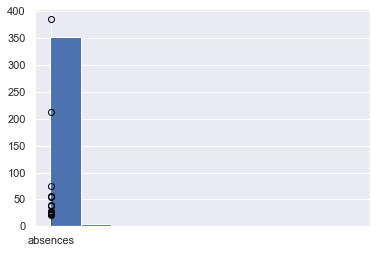

In [603]:
# изучим колонку absences
data.absences.hist()
data.boxplot(column=['absences'])
# Наблюдаем сильные выбросы
data.absences.value_counts().sort_index()


Границы выбросов: (-12.0, 20.0)


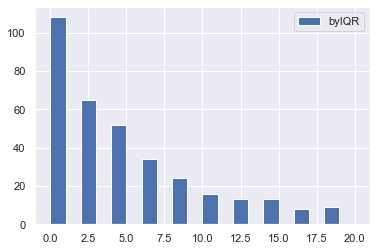

In [604]:
# выполним проверку absences на выбросы 
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
IQR = perc75 - perc25
print(f'Границы выбросов: {perc25 - 1.5*IQR, perc75 + 1.5*IQR}')
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label='byIQR', width=1);
plt.legend();
# однако остановимся на крайнем значении величины прогулов, где есть хотя бы несколько примеров, это 22 (3 примера)/ Посчитаем за выбросы значения выше 22 и избавимся от них
data = data.loc[data.absences<=22]

# НОМИНАТИВНЫЕ ПЕРЕМЕННЫЕ

## большинство номинативных переменных датасета имеют строго определенное количество уникальных значений от 2 до 5, количество их уникальных значений уже определено в легенде (мы уже заменили в некоторых колонках YES\NO на бинарные значения)

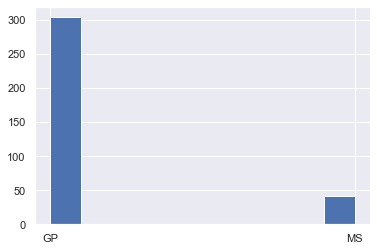

In [605]:
# Рассмотрим колонку school
data.school.hist()
# все данные поделены между двумя школами, причем по одной из них данных подавляющее количество

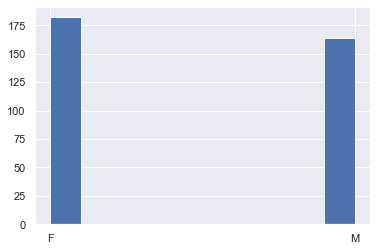

In [606]:
# по половому признаку студенты распределены нормально более-менее
data.sex.hist()

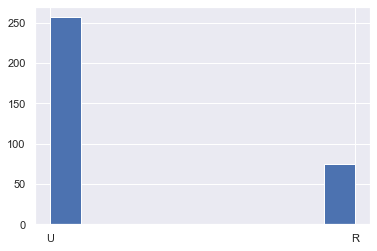

In [607]:
# Основная часть студентов городские
data.address.hist()

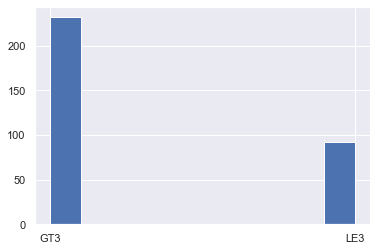

In [608]:
# Основная часть студентов живет в больших семьях
data.fam_size.hist()

In [609]:
# подавляющее большинство студентов живет с обоими родителями, так же значительное количество пустых значений
# Возможно, данный признак можно будет отбросить
data.p_status.value_counts(dropna=False)

T      279
NaN     38
A       29
Name: p_status, dtype: int64

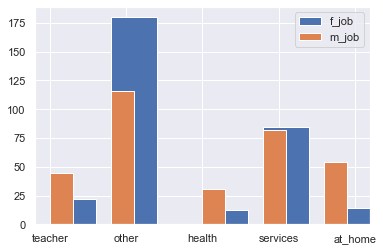

In [610]:
# рассмотрим сразу 2 схожих переменных f_job и m_job 
data.f_job.hist(width=0.6, label='f_job')
data.m_job.hist(width=0.3, label='m_job')
plt.legend();

In [611]:
# По признакам reason, guardian ничего интересного

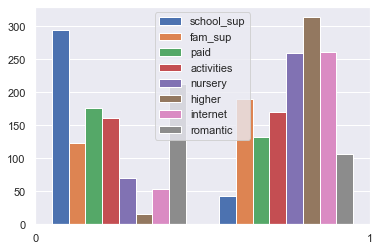

In [612]:
# группу признаков с бинарными значениями рассмотрим комплексно
bin_columns = ['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
plt.hist([data.school_sup, data.fam_sup, data.paid, data.activities, data.nursery, data.higher, data.internet, data.romantic], alpha=1, bins=2, label=bin_columns)
plt.xticks([0,1])
plt.legend();

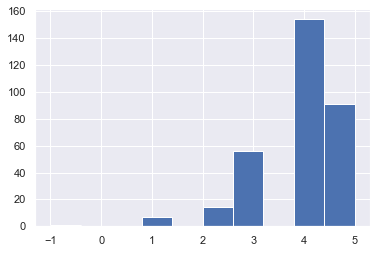

In [613]:
# Есть ошибка в колонке  fam_rel
data.fam_rel.hist();

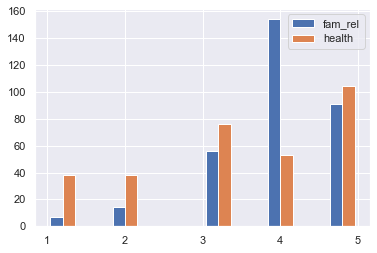

In [614]:
# удалим отрицательное значение в fam_rel
data = data.loc[data.fam_rel>=0]
# и посмотрим распределение  fam_rel вместе с health_level
plt.hist([data.fam_rel, data.health], label=['fam_rel','health'])
plt.xticks([1,2,3,4,5])
plt.legend();

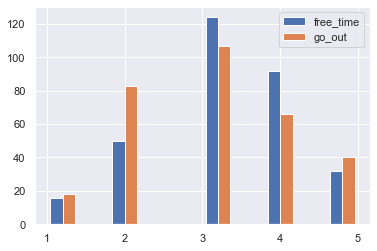

In [615]:
# free_time, go_out
plt.hist([data.free_time, data.go_out], label=['free_time','go_out'])
plt.xticks([1,2,3,4,5])
plt.legend();